In [1]:
import akshare as ak
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = (20, 10)

In [3]:
%matplotlib inline

In [4]:
df = ak.stock_zh_a_hist(symbol='603636', period='daily', start_date='20200101', end_date='20220811', adjust='qfq')

In [5]:
df.columns = ['datetime', 'open', 'close', 'high', 'low', 'volume', 'turnover', 'mplitude', 'change_rate', 'change_amount', 'turnover_rate']

In [6]:
df['av'] = df['turnover'] / df['volume']

In [7]:
df['av_mean'] = df['av'].rolling(5, min_periods=1).mean()
df['tr_mean'] = df['turnover_rate'].rolling(5, min_periods=1).mean()
df['tr_sum'] = df['turnover_rate'].rolling(5, min_periods=1).sum()
df['tr_mean_diff'] = df['tr_mean'].diff(1)
df['turnover_rate_volatility'] = df['turnover_rate'].diff(1) / df['turnover_rate'].shift(1)

In [14]:
df.tail(60)

,datetime,open,close,high,low,volume,turnover,mplitude,change_rate,change_amount,turnover_rate,av,av_mean,tr_mean,tr_sum,tr_mean_diff,turnover_rate_volatility
568,2022-05-12,10.03,10.73,11.00,10.01,592650,6.318553e+08,9.77,5.92,0.60,10.03,1066.152474,1017.529781,10.692,53.46,0.922,-0.025267
569,2022-05-13,10.67,10.59,10.79,10.37,319363,3.390955e+08,3.91,-1.30,-0.14,5.41,1061.787120,1041.463568,10.008,50.04,-0.684,-0.460618
570,2022-05-16,10.68,10.56,10.77,10.38,315521,3.357112e+08,3.68,-0.28,-0.03,5.34,1063.990188,1056.928549,9.042,45.21,-0.966,-0.012939
571,2022-05-17,10.56,10.69,10.78,10.32,324923,3.468666e+08,4.36,1.23,0.13,5.50,1067.534696,1059.701296,7.314,36.57,-1.728,0.029963
572,2022-05-18,10.93,10.57,11.02,10.27,415736,4.462047e+08,7.02,-1.12,-0.12,7.04,1073.288664,1066.550628,6.664,33.32,-0.650,0.280000
573,2022-05-19,10.18,10.45,10.55,10.14,227186,2.384208e+08,3.88,-1.14,-0.12,3.85,1049.451771,1063.210488,5.428,27.14,-1.236,-0.453125
574,2022-05-20,10.45,10.39,10.57,10.34,182197,1.914341e+08,2.20,-0.57,-0.06,3.08,1050.698667,1060.992797,4.962,24.81,-0.466,-0.200000
575,2022-05-23,10.33,10.34,10.56,10.30,217122,2.275884e+08,2.50,-0.48,-0.05,3.68,1048.205212,1057.835802,4.630,23.15,-0.332,0.194805
576,2022-05-24,10.38,9.62,10.41,9.60,273260,2.752797e+08,7.83,-6.96,-0.72,4.63,1007.391115,1045.807086,4.456,22.28,-0.174,0.258152
577,2022-05-25,9.66,10.10,10.19,9.66,242273,2.444493e+08,5.51,4.99,0.48,4.10,1008.982978,1032.945948,3.868,19.34,-0.588,-0.114471


In [5]:
df['成交额'].rolling(5).mean()

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2020-01-02,11.08,11.31,11.42,11.02,68002,7.912691e+07,3.65,3.10,0.34,1.30
1,2020-01-03,11.35,11.33,11.56,11.26,90155,1.056569e+08,2.65,0.18,0.02,1.72
2,2020-01-06,11.24,11.40,11.54,11.21,127002,1.492820e+08,2.91,0.62,0.07,2.42
3,2020-01-07,11.47,11.68,11.69,11.34,144844,1.724591e+08,3.07,2.46,0.28,2.76
4,2020-01-08,11.57,11.54,11.99,11.50,166489,2.014487e+08,4.20,-1.20,-0.14,3.17
...,...,...,...,...,...,...,...,...,...,...,...
621,2022-08-03,15.56,13.15,15.81,13.14,734684,1.043906e+09,18.29,-9.93,-1.45,12.44
622,2022-08-04,13.20,14.47,14.47,13.20,644317,9.079573e+08,9.66,10.04,1.32,10.91
623,2022-08-05,15.00,15.92,15.92,14.41,720201,1.088851e+09,10.44,10.02,1.45,12.19
624,2022-08-08,16.18,16.36,17.43,15.45,801183,1.322163e+09,12.44,2.76,0.44,13.56


In [40]:
df['diff'] = df['收盘'].diff(-1).fillna(0)

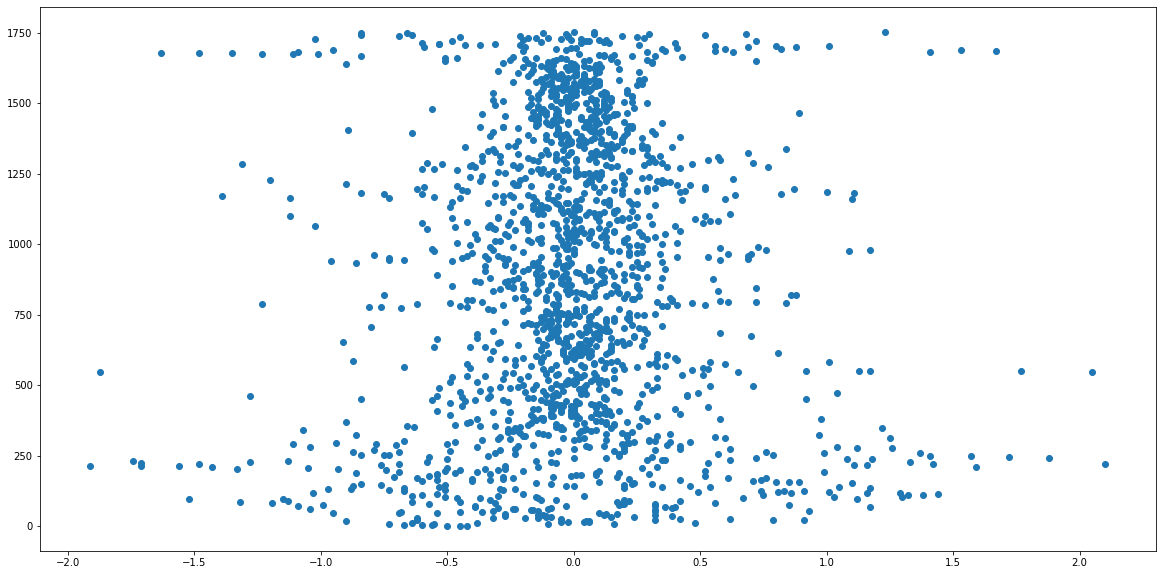

In [41]:
plt.scatter(x=df['diff'], y=range(df.shape[0]))

In [42]:
mu, std = norm.fit(df['diff'])

In [47]:
mu, std

(-0.004467236467236467, 0.42681032361618704)

<AxesSubplot:xlabel='diff', ylabel='Count'>

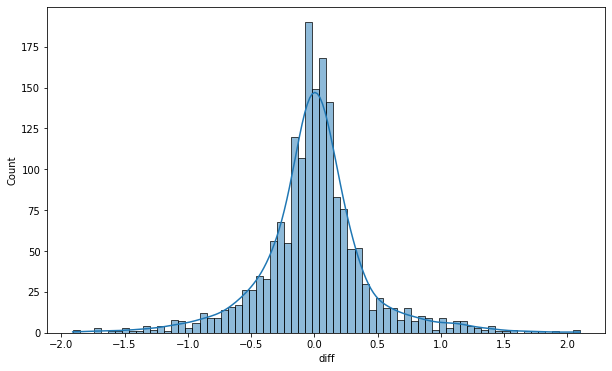

In [45]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x='diff', kde=True, ax=ax)

In [38]:
sns.set(rc={"figure.figsize":(20, 10)})

<Figure size 1440x720 with 0 Axes>

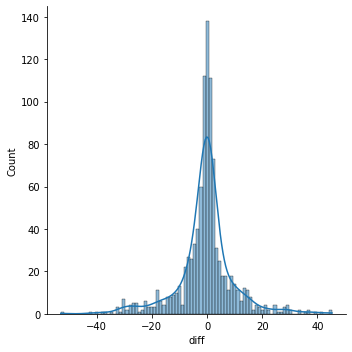

In [29]:
plt.figure(figsize=(20,10))
sns.displot(df, x='diff', kde=True)
# f, ax = plt.subplots(figsize=(20, 10))
# sns.kdeplot(df, x='diff', ax=ax)

In [34]:
df = ak.stock_zh_a_hist(symbol='300750', period='daily', start_date='20100301', end_date='20220707', adjust='qfq')

In [35]:
df['diff'] = df['收盘'].diff(-1).fillna(0)

In [36]:
mu, std = norm.fit(df['diff'])

In [37]:
mu, std

(-0.5195959595959596, 10.30055948457836)

In [18]:
x = df['diff'][400:]

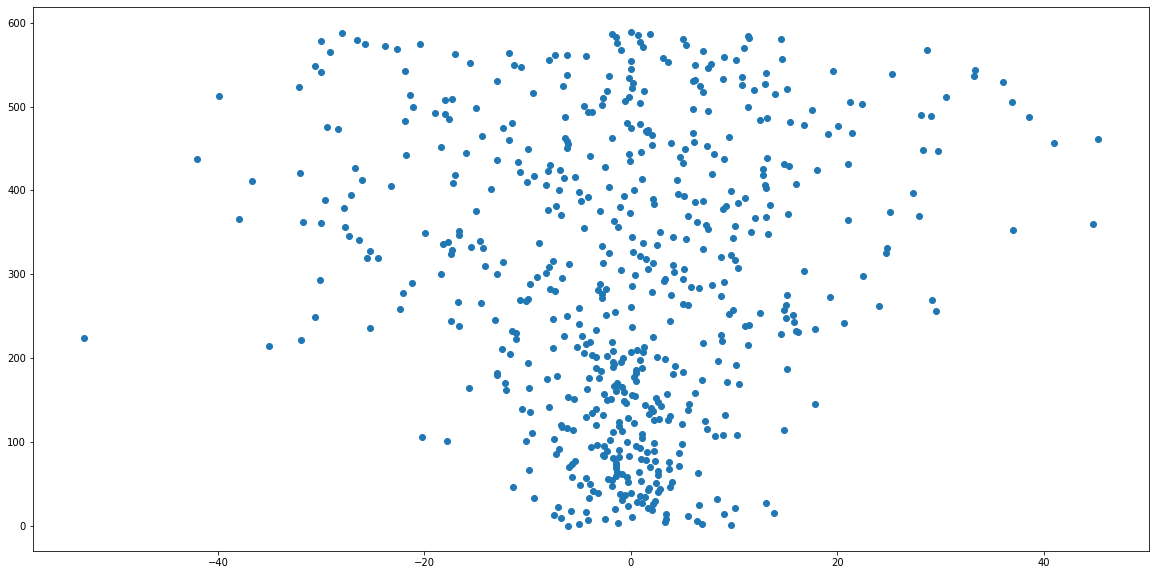

In [19]:
plt.scatter(x=x, y=range(x.shape[0]))

In [20]:
mu, std = norm.fit(x)

In [21]:
mu, std

(-0.6553728813559321, 13.174505687698373)

<AxesSubplot:xlabel='diff', ylabel='Count'>

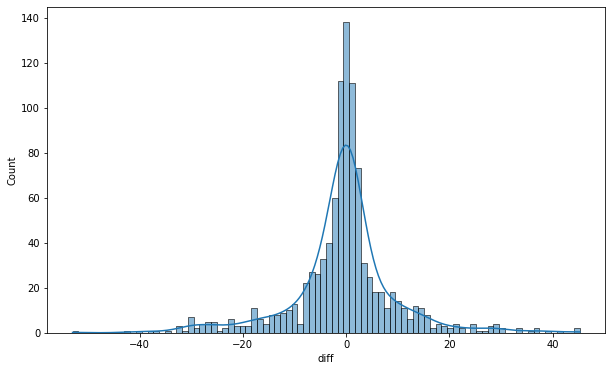

In [38]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x='diff', kde=True, ax=ax)